# Exercise: Train and Run Your First Model

We've learned that models are computer code that processes information to make a prediction or a decision. Here, we train a model to guess a comfortable boot size for a dog, based on the size of the harness that fits them.

In the examples below, there's no need to edit any code. Try to read it, understand it, then press the run button to run it. As always with these notebooks, it's vitally important that these code blocks are run in the correct order, and nothing is missed.

> **Note**: If you've never used the Jupyter Notebooks environment before, there are a few things you should be aware of:
> 
> - Notebooks are made up of *cells*. Some cells (like this one) contain *markdown* text, while others contain code.
> - You can run each code cell by using the **&#9658; Run** button. The **&#9658; Run** button will show up when you hover over the cell.
> - The output from each code cell will be displayed immediately below the cell.
> - Even though the code cells can be run individually, some variables used in the code are global to the notebook. That means that you should run all of the code cells <u>**in order**</u>. There may be dependencies between code cells, so if you skip a cell, subsequent cells might not run correctly.

## Preparing data

The first thing we do with a model is load data. We cover this in more detail in a later exercise. For now, we just write our data directly in our code. Review and run the following code to get started:


In [57]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
!pip install statsmodels


# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, we simply write the name
# of the variable and it is printed nicely 
dataset

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


As you can see, we have the sizes of boots and harnesses for 50 avalanche dogs.

We want to use harness size to estimate boot size. This means harness_size is our input. We want a model that will process the input and make its own estimations of the boot size (output).

# Select a model

The first thing we must do is select a model. We're just getting started, so let's start with a very simple model called OLS. This is just a straight line (sometimes called a trendline).

Let's use an existing library to create our model, but we won't train it yet.

In [58]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [59]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


## Train our model

OLS models have two parameters (a slope and an offset), but these haven't been set in our model yet. We need to _train_ (_fit_) our model to find these values so that the model can reliably estimate dogs' boot size based on their harness size. 

The following code fits our model to data you've now seen:

In [60]:
# Train (fit) the model so that it creates a line that 
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.5859254167382713
Line Intercept: 5.7191098126825874


Notice how training the model set its parameters. We could interpret these directly, but it's simpler to see it as a graph:


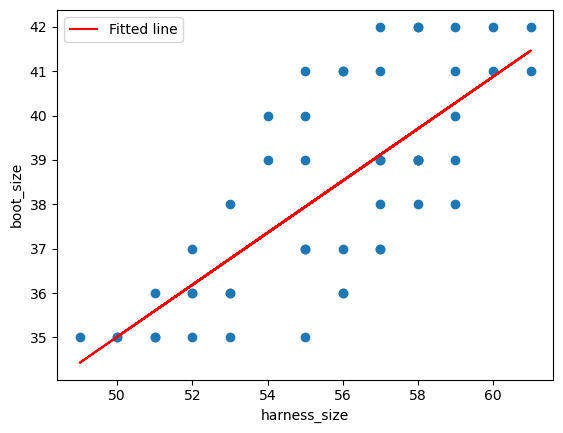

In [61]:
import matplotlib.pyplot as plt

# Show a scatter plot of the data points and add the fitted line
# Don't worry about how this works for now
plt.scatter(dataset["harness_size"], dataset["boot_size"])
plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

The graph above shows our original data as circles with a red line through it. The red line shows our _model_.

We can look at this line to understand our model. For example, we can see that as harness size increases, so will the estimated boot size. 

## Use the model

Now that we've finished training, we can use our model to predict a dog's boot size from their harness size. 

For example, by looking at the red line, we can see that that a harness size of `52.5` (x axis) corresponds to a boot size of about `36.5` (y axis).

We don't have to do this by eye though. We can use the model in our program to predict any boot size we like. Run the following code to see how we can use our model now that it's trained:

In [62]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.480194191441825


If you'd like, change the value of `52.5` in `harness_size` to a new value and run the block above to see the model in action.

## Summary

Well done! You've trained your first model. We've demonstrated some topics here without detailed explanation in order to just get your feet wet. In later units, we explain many of these topics in more detail.

# What are inputs and outputs?


The goal of training is to improve a model so that it can make high-quality estimations or predictions. Once trained, you can use a model in the real world like normal software.

Models don’t train themselves. They're trained using data plus two pieces of code, the objective function and the optimizer. Let’s explore how these components work together to train a model to work well.

## The objective
The objective is what we want the model to be able to do. For example, the objective of our scenario is to be able to estimate a dog’s boot size based on their harness size.

For a computer to understand our objective, we need to provide our goal as a code snippet called an objective function (also known as a cost function). Objective functions judge whether the model is doing a good job (estimating boot size well) or bad job (estimating boot size badly). We cover objective functions in more depth in later learning material.

## The data
Data refers to the information that we provide to the model (also known as inputs). In our scenario, the input is harness size.

Data also refers to information that the objective function might need. For example, if our objective function reports whether the model guessed the boot size correctly, it needs to know the correct boot size! For this reason, in our previous exercise, we provided both harness sizes and the correct answers to the training code.

We'll practice working with data in the next exercise.

## The optimizer
During training, the model makes a prediction, and the objective function calculates how well it performed. The optimizer is code that then changes the model’s parameters so the model will do a better job next time.

How an optimizer adjusts the parameters is complex, and something we cover in later material. Don’t be intimidated, though; we don’t normally write our own optimizers, we use open-source frameworks where the hard work has been done for us.

It's important to keep in mind that the objective, data, and optimizer are simply a means to train the model. They aren't needed once training is complete. It's also important to remember that training only changes the parameter values inside of a model; it doesn't change what kind of model is used.

# Exercise - Visualize inputs and output

## Exercise: Datasets in Python
In the previous exercise, we loaded some data and fit a model to it. Several aspects of this were simplified, particularly that the data was hard-coded into our python script, and we didn't spend any time really looking at the data itself.

Here, we load data from a file, filter it, and graph it. Doing so is a very important first step in order to build proper models, or to understand their limitations.

As before, there's no need to edit any code in the examples in this unit. Try to read it, understand it, then press the Run button to run it. As always, it's vitally important that these code blocks are run in the correct order, and nothing is missed.

## Load data with Pandas
There are various libraries that help you work with data. In Python, one of the most common libraries is Pandas. We used pandas briefly in the previous exercise. Pandas can open data saved as text files and store it in an organized table called a DataFrame.

Let's open some text data that's stored on disk. Our data is saved in a file called doggy-boot-harness.csv.

In [63]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

# Read the text file containing data using pandas
dataset = pandas.read_csv(r"C:\Users\Sidda\Downloads\doggy-boot-harness.csv")

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


As you can see, this dataset contains information about dogs, including their doggy boot size, harness size, sex, and age in years.

Data is stored as columns and rows, similar to a table you might see in Excel.

## Filter data by Columns

Data is easy to filter by columns. We can either type this directly, like `dataset.my_column_name`, or like so: `dataset["my_column_name"]`.

We can use this to either extract data, or to delete data.

Lets take a look at the harness sizes, and delete the `sex` and `age_years` columns. 

In [64]:
# Look at the harness sizes
print("Harness sizes")
print(dataset.harness_size)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)


Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Available columns after deleting sex and age information:
['boot_size' 'harness_size']


## Filter data by Rows

We can get data from the top of the table by using the `head()` function, or from the bottom of the table by using the `tail()` function. 

Both functions make a shallow copy of a section of our dataframe. Here, we're sending these copies to the `print()` function. The head and tail views can also be used for other purposes, such as for use in analyses or graphs.

In [65]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


We can also filter logically. For example, we can look at data for dogs who have a harness smaller than a size 55.

This works by calculating a `True` or `False` value for each row, then keeping only those rows where the value is `True`.

In [66]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means 
# they are smaller than 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Now apply this 'mask' to our data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")

We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

This looks like a lot of code, but we can compress the important parts into a single line.

Let's do something similar: restrict our data to only those with boot sizes smaller than 40. 

In [67]:
# Make a copy of the dataset that only contains dogs with 
# a boot size below size 40
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_paws = dataset[dataset.boot_size < 40].copy()


# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


## Graph Data

Graphing your data is often the easiest way to understand it. 

Lets make a simple graph of _harness size_ versus _boot size_ for our avalanche dogs with smaller feet. 

Text(0, 0.5, 'boot_size')

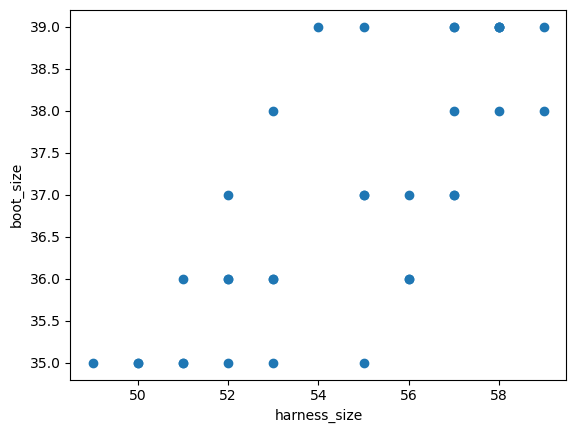

In [68]:
# Load and prepare matplotlib to use for plotting graphs
import matplotlib.pyplot as plt


# Show a graph of harness size by boot size:
plt.scatter(data_smaller_paws["harness_size"], data_smaller_paws["boot_size"])

# add labels
plt.xlabel("harness_size")
plt.ylabel("boot_size")

## Create New Columns

The preceding graph shows the relationship we want to investigate for our store, but some customers might want harness-size lists in inches, not centimeters. How can we view these harness sizes in imperial units?

To do this, we need to create a new column called `harness_size_imperial` and put that on the X axis instead.

Creating new columns uses very similar syntax to what we've seen before.

Text(0, 0.5, 'boot_size')

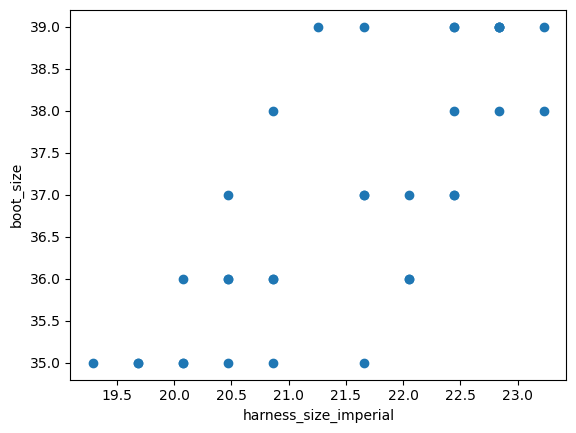

In [69]:
# Convert harness sizes from metric to imperial units 
# and save the result to a new column
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54

# Show a graph of harness size in imperial units
plt.scatter(data_smaller_paws["harness_size_imperial"], data_smaller_paws["boot_size"])
plt.xlabel("harness_size_imperial")
plt.ylabel("boot_size")

We've now graphed our new column of data (`harness_size_imperial`) against boot size for dogs with small paws.

## Summary

We've introduced working with data in Python, including:

* Opening data from a file into a `DataFrame` (table).
* Inspecting the top and bottom of the dataframe.
* Adding and removing columns of data.
* Removing rows of data based on certain criteria.
* Graphing data to understand trends.

Learning to work with dataframes can feel tedious or dry, but keep going, because these basic skills are critical to unlocking the exciting machine-learning techniques that we cover in later modules.

# How to use a model


## Training versus using a model
It's important to make a distinction between training and using a model.

Using a model means providing inputs and receiving an estimation or prediction. We do this process both when we're training our model and when we or our customers use it in the real world. Using a model normally takes less than a few seconds.



# Exercise: Using a Trained Model on New Data

In Unit 3, we created a basic model that let us find the relationship between a dog's harness size and their boot size. We showed how this model could then be used to make a prediction about a new, previously unseen dog.

It's common to build, train, then use a model while we are just learning about machine learning; but in the real world, we don't want to train the model _every time_ we want to make a prediction.

Consider our avalanche-dog equipment store scenario:

* We want to train the model just once, then load that model onto the server that runs our online store. 
* Although the model is _trained_ on a dataset we downloaded from the internet, we actually want to _use_ it to estimate the boot size of our customers' dogs who are not in this dataset! 

How can we do this?

Here, we'll:

1. Create a basic model
2. Save it to disk
3. Load it from disk
4. Use it to make predictions about a dog who was not in the training dataset

## Load the dataset

Let's begin by opening the dataset from file.

In [70]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

# Load a file containing dog's boot and harness sizes
data = pandas.read_csv(r"C:\Users\Sidda\Downloads\doggy-boot-harness.csv")

# Print the first few rows
data.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


## Create and train a model

As we've done before, we create a simple Linear Regression model and train it on our dataset.

In [71]:
import statsmodels.formula.api as smf

# Fit a simple model that finds a linear relationship
# between boot size and harness size, which we can use later
# to predict a dog's boot size, given their harness size
model = smf.ols(formula = "boot_size ~ harness_size", data = data).fit()

print("Model trained!")

Model trained!


## Save and load a model

Our model is ready to use, but we don't need it yet. Let's save it to disk.

In [72]:
import joblib

model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(model, model_filename)

print("Model saved!")

Model saved!


In [73]:
model_loaded = joblib.load(model_filename)

print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


## Put it together

On our website, we want to take the harness of our customer's dog, then calculate their dog's boot size using the model that we've already trained.

Let's put everything here together to make a function that loads the model from disk, then uses it to predict our customer's dog's boot size.

In [74]:
# Let's write a function that loads and uses our model
def load_model_and_predict(harness_size):
    '''
    This function loads a pretrained model. It uses the model
    with the customer's dog's harness size to predict the size of
    boots that will fit that dog.

    harness_size: The dog harness size, in cm 
    '''

    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print("We've loaded a model with the following parameters:")
    print(loaded_model.params)

    # Prepare data for the model
    inputs = {"harness_size":[harness_size]} 

    # Use the model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]

    return predicted_boot_size

# Practice using our model
predicted_boot_size = load_model_and_predict(45)

print("Predicted dog boot size:", predicted_boot_size)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted dog boot size: 32.085753565904795


## Real world use 

We've done it; we can predict an avalanche dog's boot size based on the size of their harness. Our last step is to use this to warn people if they might be buying the wrong sized doggy boots. 

As an example, we make a function that accepts the harness size, the size of the boots selected, and returns a message for the customer. We would integrate this function into our online store.

In [75]:
def check_size_of_boots(selected_harness_size, selected_boot_size):
    '''
    Calculates whether the customer has chosen a pair of doggy boots that 
    are a sensible size. This works by estimating the dog's actual boot 
    size from their harness size.

    This returns a message for the customer that should be shown before
    they complete their payment 

    selected_harness_size: The size of the harness the customer wants to buy
    selected_boot_size: The size of the doggy boots the customer wants to buy
    '''

    # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # The selected boots are probably OK
        return f"Great choice! We think these boots will fit your avalanche dog well."

    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small 
        return "The boots you have selected might be TOO SMALL for a dog as "\
               f"big as yours. We recommend a doggy boots size of {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
        # Selected boots might be too big 
        return "The boots you have selected might be TOO BIG for a dog as "\
               f"small as yours. We recommend a doggy boots size of {estimated_boot_size}."
    

# Practice using our new warning system
check_size_of_boots(selected_harness_size=55, selected_boot_size=39)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The boots you have selected might be TOO BIG for a dog as small as yours. We recommend a doggy boots size of 38.'

Change `selected_harness_size` and `selected_boot_size` in the preceding example and re-run the cell to see this in action.

## Summary

Well done! We've put together a system that can predict if customers are buying doggy boots that may not fit their avalanche dog, based solely on the size of harness they're purchasing. 

In this exercise, we practiced:

1. Creating basic models
2. Training, then saving them to disk
3. Loading them from disk
4. Making predictions with them using new data sets